# TAREA PCA 

## Ralphy Núñez Mercado

### Imports necesarios  

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error ,r2_score, classification_report,mean_absolute_error,confusion_matrix



### Preparar el dataset 

In [55]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


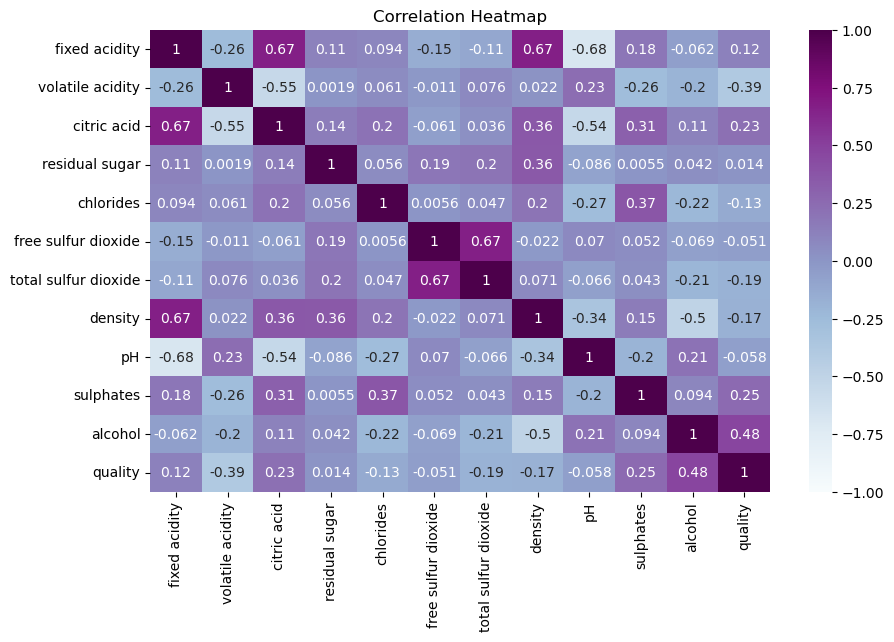

In [56]:

corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            cmap="BuPu",
            vmin=-1,
            vmax=1,
            annot=True)
plt.title("Correlation Heatmap")
plt.show()

### Dividir los datos

In [57]:
X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Estandarizar los datos

In [58]:
sc = StandardScaler()
X_train_escalado = sc.fit_transform(X_train)
X_test_escalado = sc.transform(X_test)

### Aplicar PCA manteniendo el 95% de la varianza


In [59]:
pca = PCA(n_components=0.95)
principalComponents = pca.fit_transform(X_train_escalado)

pca_df = pd.DataFrame(data=principalComponents)

pca_df.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# Agregar la variable objetivo al DataFrame final
y_train = pd.DataFrame(y_train)
final_pca_df = pca_df.copy()
final_pca_df['calidad'] = y_train


### SVC 

### Convertimos los valores de la columna calidad a binario dependiendo de si es buena o mala calidad, poniendo como baremo que si es 6 o mayor se considera una buena calidad 

In [60]:
final_pca_df['calidad_binario'] = final_pca_df['calidad'].apply(lambda x: 1 if x >= 6 else 0)
final_pca_df

,0,1,2,3,4,5,6,7,8,calidad,calidad_binario
0,1.058382,0.200394,-0.965230,-0.595770,-0.267372,0.934819,0.249007,0.949835,-0.164013,5,0
1,1.955246,-0.062234,0.151854,-1.490165,-0.985238,0.051680,-0.801617,-0.293892,0.425775,5,0
2,1.566641,-1.907106,0.134804,-0.206288,-0.114617,0.641509,0.160005,-0.024594,-0.337621,5,0
3,-3.652308,-0.463228,1.760949,0.803878,0.681280,-0.895522,1.957764,-0.191080,-1.314074,8,1
4,-1.177005,0.264157,-1.040813,-0.244599,2.269212,-0.814074,-1.090958,-0.510703,0.130404,6,1
...,...,...,...,...,...,...,...,...,...,...,...
1274,0.124896,-0.325333,-1.913410,-0.347518,-0.460933,-0.682541,-0.350590,0.289200,-0.294684,5,0
1275,-1.391055,1.168527,-0.709492,-0.196265,-1.042923,0.202999,0.128962,0.313605,0.559755,5,0
1276,0.058080,0.466344,-0.343874,0.278560,-0.729695,0.160089,0.115029,-0.326096,-1.112991,6,1
1277,3.046542,-0.875776,-0.233045,-1.714066,2.076154,0.002577,1.365976,1.341619,-0.266953,6,1


### Dividir el dataframe

In [61]:
X = final_pca_df.iloc[:, 0:9]  
y = final_pca_df['calidad_binario']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


### Entrenear los modelos con diferentes kernels

In [62]:
svc_linear = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
svc_linear.fit(X_train, y_train)

svc_poly = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))
svc_poly.fit(X_train, y_train)

svc_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))
svc_rbf.fit(X_train, y_train)

svc_sigmoid = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid'))
svc_sigmoid.fit(X_train, y_train)

y_pred_linear = svc_linear.predict(X_test)
y_pred_poly = svc_poly.predict(X_test)
y_pred_rbf = svc_rbf.predict(X_test)
y_pred_sigmoid = svc_sigmoid.predict(X_test)

### Mostrar las métricas de los diferentes kernels

In [63]:
print("SVC KERNEL LINEAR")
print(classification_report(y_test,y_pred_linear))

print("SVC KERNEL POLY")
print(classification_report(y_test,y_pred_poly))

print("SVC KERNEL RGF")
print(classification_report(y_test,y_pred_rbf))

print("SVC KERNEL SIGMOID")
print(classification_report(y_test,y_pred_sigmoid))

SVC KERNEL LINEAR
              precision    recall  f1-score   support

           0       0.77      0.75      0.76       162
           1       0.75      0.77      0.76       158

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76      0.76      0.76       320

SVC KERNEL POLY
              precision    recall  f1-score   support

           0       0.77      0.69      0.73       162
           1       0.71      0.79      0.75       158

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

SVC KERNEL RGF
              precision    recall  f1-score   support

           0       0.76      0.72      0.74       162
           1       0.72      0.77      0.74       158

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74  

Como vemos el mejor kernel para este dataframe es el linear

### Matriz de confusión

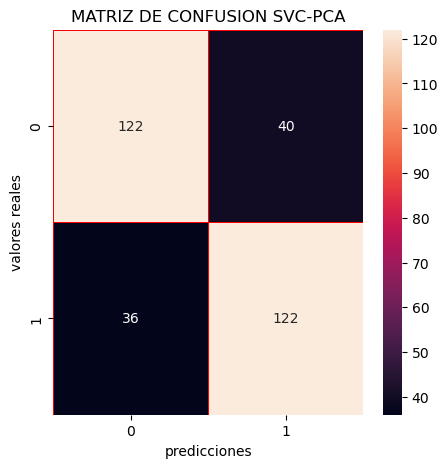

In [64]:
cm= confusion_matrix(y_test,y_pred_linear) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION SVC-PCA")
plt.show()

# NO USANDO PCA

### Preparar el dataframe

In [65]:
df = pd.read_csv('winequality-red.csv')

df['calidad_binario'] = df['quality'].apply(lambda x: 1 if x >= 6 else 0)


X = df[['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']]
y = df['calidad_binario']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

sc = StandardScaler()
X_train_escalado = sc.fit_transform(X_train)
X_test_escalado = sc.transform(X_test)

### Entrenear los modelos con diferentes kernels

In [66]:
svc_linear = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='linear'))
svc_linear.fit(X_train_escalado, y_train)

svc_poly = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='poly'))
svc_poly.fit(X_train_escalado, y_train)

svc_rbf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf'))
svc_rbf.fit(X_train_escalado, y_train)

svc_sigmoid = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='sigmoid'))
svc_sigmoid.fit(X_train_escalado, y_train)

y_pred_linear = svc_linear.predict(X_test_escalado)
y_pred_poly = svc_poly.predict(X_test_escalado)
y_pred_rbf = svc_rbf.predict(X_test_escalado)
y_pred_sigmoid = svc_sigmoid.predict(X_test_escalado)

### Mostrar las métricas de los diferentes kernels

In [67]:
print("SVC KERNEL LINEAR")
print(classification_report(y_test,y_pred_linear))

print("SVC KERNEL POLY")
print(classification_report(y_test,y_pred_poly))

print("SVC KERNEL RGF")
print(classification_report(y_test,y_pred_rbf))

print("SVC KERNEL SIGMOID")
print(classification_report(y_test,y_pred_sigmoid))

SVC KERNEL LINEAR
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       148
           1       0.77      0.73      0.75       172

    accuracy                           0.74       320
   macro avg       0.74      0.74      0.74       320
weighted avg       0.74      0.74      0.74       320

SVC KERNEL POLY
              precision    recall  f1-score   support

           0       0.72      0.74      0.73       148
           1       0.77      0.76      0.76       172

    accuracy                           0.75       320
   macro avg       0.75      0.75      0.75       320
weighted avg       0.75      0.75      0.75       320

SVC KERNEL RGF
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       148
           1       0.78      0.78      0.78       172

    accuracy                           0.76       320
   macro avg       0.76      0.76      0.76       320
weighted avg       0.76  

### Matriz de confusion

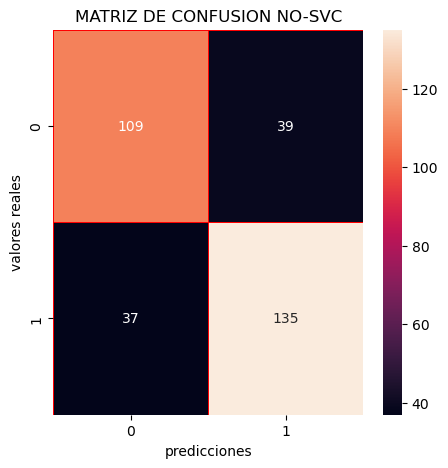

In [68]:
cm= confusion_matrix(y_test,y_pred_rbf) 

f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(cm,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("predicciones")
plt.ylabel("valores reales")
plt.title("MATRIZ DE CONFUSION NO-SVC")
plt.show()

Sí, es completamente normal que obtengas un rendimiento similar al usar PCA en comparación con el modelo sin reducción de dimensionalidad, especialmente si:

Las características originales ya contienen suficiente información relevante

Si no hay mucha colinealidad o datos irrelevantes, el PCA no aporta un gran beneficio.

Estás reteniendo la mayoría de la varianza

Si seleccionas suficientes componentes principales (por ejemplo, reteniendo un 95-99% de la varianza), el modelo tendrá casi la misma información que el dataset original.

La reducción de dimensiones no es drástica

Si reduces de 11 features a 8 o 9, el impacto no será tan grande.

Si reduces a 2 o 3, podrías ver una diferencia más notable.

El algoritmo ya es robusto a la correlación entre variables

Algunos modelos, como SVM o árboles de decisión, pueden manejar la correlación entre variables sin necesidad de PCA.

¿Cuándo se nota más la diferencia con PCA?
Cuando hay muchas características irrelevantes o redundantes.

Cuando el dataset tiene altas dimensiones (más de 100 features).

Cuando el modelo se ve afectado por la colinealidad.

Si tu modelo con y sin PCA tiene rendimientos similares, es posible que no necesites PCA en este caso.